In [71]:
import pandas as pd
import matplotlib
import seaborn as sns

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [69]:
uc =  ['Name', 'Ticket', 'Cabin']

In [30]:
train_clean = train.drop(columns=uc)
test_clean = test.drop(columns=uc)

In [56]:
def impute_data(df):
    df_copy = df.copy()
    
    categorial_vars = list(df_copy.select_dtypes(include=['object']).columns.values)
    
    for col in categorial_vars:
        
        if(df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
    
    numerical_vars = list(df_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    
    for col in numerical_vars:
        
        if(df_copy[col].isnull().values.any()):
            df_copy[col].fillna(df_copy[col].median(), inplace=True)
    
    return df_copy

In [76]:
test_full = impute_data(test_clean)
train_full = impute_data(train_clean)

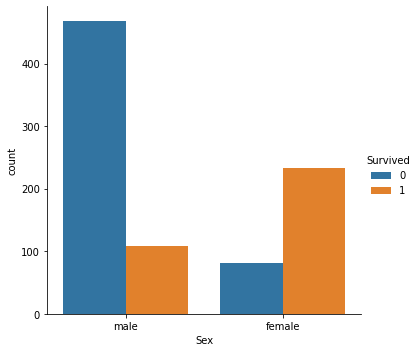

In [82]:
sns.catplot('Sex', data=train_full, kind='count', hue='Survived')

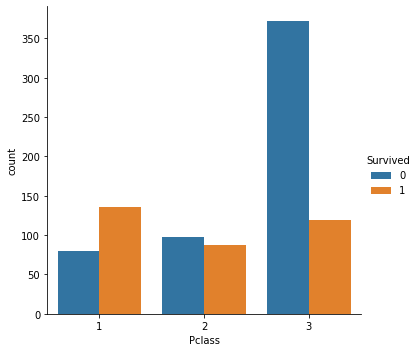

In [85]:
sns.catplot('Pclass', data=train_full, kind='count', hue='Survived')

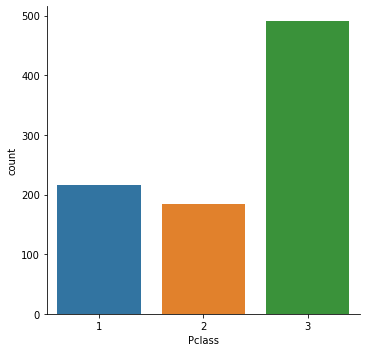

In [87]:
sns.catplot('Pclass', data=train_full, kind='count')

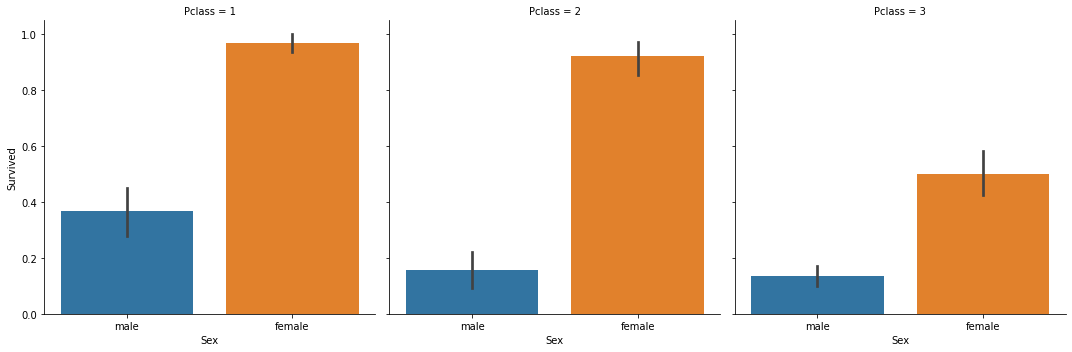

In [91]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=train_full, kind='bar')

In [98]:
train_full['Family_size'] = train_full['Parch'] + train_full['SibSp']
test_full['Family_size'] = test_full['Parch'] + test_full['SibSp']
train_full.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
886,887,0,2,male,27.0,0,0,13.00,S,0
887,888,1,1,female,19.0,0,0,30.00,S,0
888,889,0,3,female,28.0,1,2,23.45,S,3
889,890,1,1,male,26.0,0,0,30.00,C,0
890,891,0,3,male,32.0,0,0,7.75,Q,0


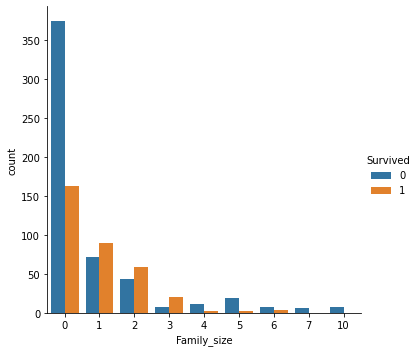

In [101]:
sns.catplot('Family_size', kind='count', data=train_full, hue='Survived')

In [103]:
train_full.to_csv('train_imputed.csv')
test_full.to_csv('test_imputed.csv')

In [109]:
(test_full['Sex'] == 'male') & (test_full['Pclass'] == 3)

0       True
1      False
2      False
3       True
4      False
       ...  
413     True
414    False
415     True
416     True
417     True
Length: 418, dtype: bool

In [112]:
(~((test_full['Sex'] == 'male') & (test_full['Pclass'] == 3))).astype(int).values

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [190]:
train_full = pd.read_csv('train_imputed.csv', index_col='PassengerId')
test_full = pd.read_csv('test_imputed.csv', index_col='PassengerId')

In [288]:
y_train = train_full['Survived']
train_sep = train_full.drop(columns=['Survived'])

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,1
2,1,1,female,38.0,1,0,71.2833,C,1
3,2,3,female,26.0,0,0,7.9250,S,0
4,3,1,female,35.0,1,0,53.1000,S,1
5,4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
887,886,2,male,27.0,0,0,13.0000,S,0
888,887,1,female,19.0,0,0,30.0000,S,0
889,888,3,female,28.0,1,2,23.4500,S,3


In [192]:
def encode_categorial(df_train, df_test):
    test_start_idx = df_train.index[-1]
    
    concated_df = pd.concat([df_train, df_test], sort=False)
    
    encoded_df = pd.get_dummies(concated_df, drop_first=True)
    
    df_train_encoded, df_test_encoded = encoded_df.iloc[:test_start_idx, :], encoded_df.iloc[test_start_idx:, :]
    
    return df_train_encoded, df_test_encoded

In [199]:
X_train, X_test = encode_categorial(train_sep, test_full)

In [230]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt

In [196]:
dt_clf = DecisionTreeClassifier()

In [252]:
%%time

dt_clf.fit(X_train, y_train);

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 10.2 ms


DecisionTreeClassifier()

In [210]:
dt_clf.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [234]:
def save_visualized_tree(clf, X, file_name):
    export_graphviz(clf, feature_names=X.columns, out_file=file_name + '.dot', filled=True)
    
    !dot -Tpng {file_name}.dot -o {file_name}.png

In [235]:
save_visualized_tree(dt_clf, X_train, 'tree')

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
clf = DecisionTreeClassifier()

parameters = {
            'criterion': ['entropy', 'gini'],
            'max_depth': range(1, 10),
            'min_samples_split': range(2, 10),
            'min_samples_leaf': range(1, 10)
            }

grid_cv = GridSearchCV(clf, parameters, cv=5)

In [253]:
%%time

grid_cv.fit(X_train, y_train);

CPU times: user 55.6 s, sys: 0 ns, total: 55.6 s
Wall time: 55.6 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [257]:
best_model = grid_cv.best_estimator_
print ("best params: ", grid_cv.best_params_)

best params:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 4}


In [275]:
grid_pred = best_model.predict(X_test)

save_visualized_tree(best_model, X_train, 'tree_gridsearch');

In [255]:
from sklearn.model_selection import RandomizedSearchCV

In [260]:
random_grid_cv = RandomizedSearchCV(clf, parameters, cv=5)

In [270]:
%%time

random_grid_cv.fit(X_train, y_train);

CPU times: user 429 ms, sys: 90 µs, total: 429 ms
Wall time: 427 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10)})

In [262]:
best_model_rand = random_grid_cv.best_estimator_

In [271]:
print('best params: ', random_grid_cv.best_params_)

best params:  {'min_samples_split': 8, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy'}


In [274]:
rand_grid_search = best_model_rand.predict(X_test)

save_visualized_tree(best_model_rand, X_train, 'tree_randsearch');

In [286]:
def make_prediction_file(prediction, test_data, name):
    result = pd.DataFrame({'PassengerId': test_data.reset_index()['PassengerId'], "Survived": prediction})
    result.to_csv(name, index=False)

In [287]:
make_prediction_file(grid_pred, test_full, 'titanic_dt.csv')

In [ ]:
make_prediction_file(, test_full, 'titanic_dt_gridsearch.csv')